### 여성 매출 관련 데이터

In [102]:
import pandas as pd

food_money_df = pd.read_csv("/home/mac/project_ws/eda-repo-5/data/여성매출관련_데이터/전국성연령대식품소비성향데이터.csv", encoding='euc-kr')
food_money_df

,BASE_YM,MDCL_TOID_CODE,MDCL_TOID_NM,MENU_LGLS_CODE,MENU_LGLS_NM,MENU_MDCL_CODE,MENU_MDCL_NM,MLE_Y20_BELO_SELG_AMNT,MLE_Y20_SELG_AMNT,MLE_Y30_SELG_AMNT,...,MLE_Y30_USE_NCAS,MLE_Y40_USE_NCAS,MLE_Y50_USE_NCAS,MLE_Y60_ANM_USE_NCAS,WO_Y20_BELO_USE_NCAS,WO_Y20_USE_NCAS,WO_Y30_USE_NCAS,WO_Y40_USE_NCAS,WO_Y50_USE_NCAS,WO_Y60_ANM_USE_NCAS
0,202312,Q10,일식/수산물,L,전/부침류,L02,야채전/부침류,NaN,2108200.0,7997500.0,...,510.0,727.0,1334.0,977.0,NaN,271.0,372.0,522.0,1131.0,706.0
1,202406,Q06,분식,Y,추가/사리,Y01,추가/사리,236800.0,4242300.0,9578872.0,...,4607.0,6846.0,6808.0,3950.0,130.0,2464.0,3945.0,6030.0,4621.0,2028.0
2,202311,Q01,간이주점,A,밥류,A09,볶음밥류,20000.0,9131906.0,7755900.0,...,1304.0,1206.0,950.0,296.0,18.0,983.0,552.0,477.0,329.0,118.0
3,202307,Q10,일식/수산물,D,국/탕/찌개/전골류,D07,찌개류,36000.0,3793800.0,14598757.0,...,1796.0,3691.0,6496.0,5615.0,NaN,226.0,839.0,1717.0,2891.0,2521.0
4,202310,Q08,유흥주점,D,국/탕/찌개/전골류,D02,나베류,NaN,427700.0,257000.0,...,10.0,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27300,202311,Q12,중식,S,떡류,S02,호떡류,NaN,NaN,NaN,...,NaN,10.0,12.0,34.0,NaN,NaN,NaN,18.0,26.0,NaN
27301,202310,Q03,닭/오리요리,T,빵/과자류,T28,크로와상류,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN
27302,202403,Q12,중식,O,장/장아찌류,O01,수산물장류,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27303,202310,Q12,중식,T,빵/과자류,T01,(잉글리쉬)머핀류,NaN,NaN,68000.0,...,4.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN


In [103]:
len(food_money_df['MDCL_TOID_NM'].unique())

16

In [104]:
len(food_money_df['MENU_LGLS_NM'].unique())

26

In [105]:
len(food_money_df['MENU_MDCL_NM'].unique())

168

In [106]:
food_money_df = food_money_df[["MDCL_TOID_NM","MENU_LGLS_NM", "MENU_MDCL_NM", "MLE_Y20_SELG_AMNT"]]

In [107]:
store_df = food_money_df[["MDCL_TOID_NM", "MLE_Y20_SELG_AMNT"]]
store_df = store_df.groupby("MDCL_TOID_NM").sum().astype(int)
store_df = store_df.sort_values(by="MLE_Y20_SELG_AMNT", ascending= False)

In [108]:
store_df = store_df.reset_index()

In [109]:
# 필터링: 유흥주점과 간이주점 제외 (정확한 열 이름 사용)
store_df = store_df[~store_df['MDCL_TOID_NM'].isin(['유흥주점', '간이주점', '휴게소/대형업체', '음식배달서비스'])]
store_df = store_df.replace("제과/제빵/떡/케익","제과/제빵")

/tmp/ipykernel_19047/1264121046.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


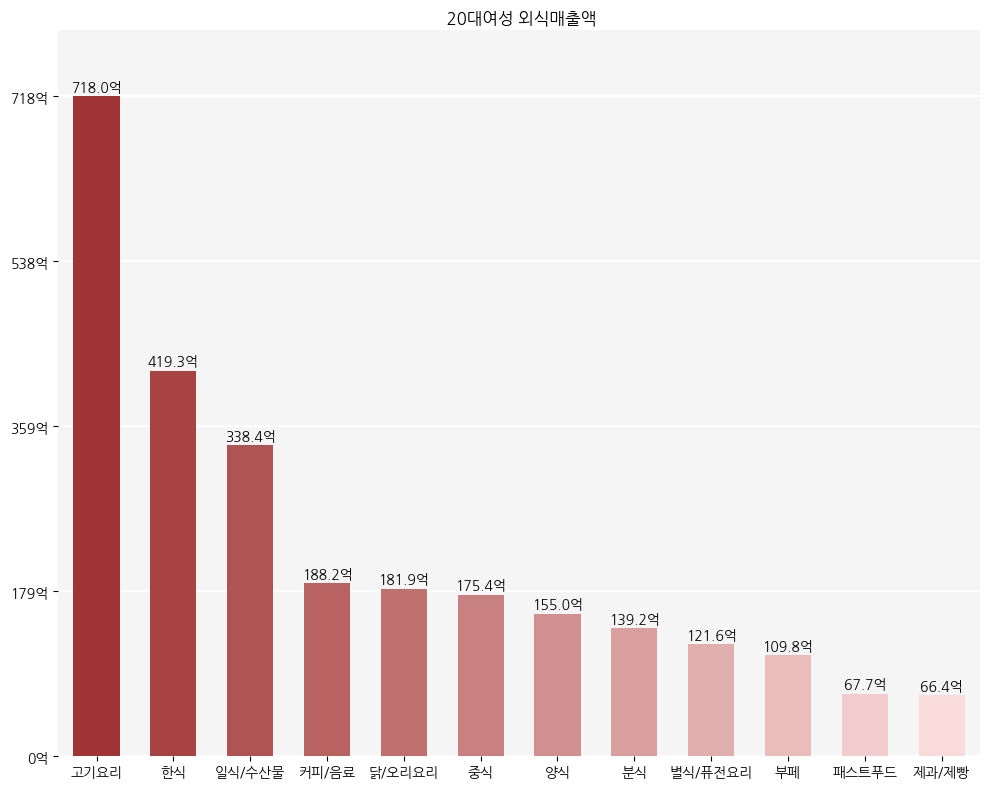

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import numpy as np
import matplotlib.colors as mcolors

sorted_df = store_df.sort_values(by='MLE_Y20_SELG_AMNT', ascending=False).head(12)

# 데이터 개수에 맞는 색상 팔레트 생성 (높은 값이 옅은 색으로)
n_bars = len(sorted_df)
base_color = '#B22222'  # 기본 빨간색
light_color = '#FFD6D6'  # 가장 옅은 색
cmap = mcolors.LinearSegmentedColormap.from_list('custom_red', [base_color, light_color], N=n_bars)
colors = [mcolors.rgb2hex(cmap(i)) for i in range(n_bars)]

# 그래프 스타일 설정
plt.figure(figsize=(10, 8))
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False

# 세로 막대 그래프 그리기
ax = sns.barplot(
    data=sorted_df,
    x='MDCL_TOID_NM',
    y='MLE_Y20_SELG_AMNT',
    palette=colors,
    width=0.6
)

# 가장 큰 값 단위 설정
max_value = sorted_df['MLE_Y20_SELG_AMNT'].max()
if max_value >= 1e11:
    unit = '조'
    divisor = 1e11
elif max_value >= 1e8:
    unit = '억'
    divisor = 1e8
elif max_value >= 1e6:
    unit = '백만'
    divisor = 1e6
else:
    unit = ''
    divisor = 1

# Y축 범위 설정 및 라벨 조정
yticks = np.linspace(0, max_value, num=5)
ytick_labels = [f"{int(tick/divisor):,}{unit}" for tick in yticks]
plt.yticks(yticks, ytick_labels)

# 흰색 그리드 추가
plt.grid(axis='y', linestyle='-', color='white', linewidth=1.5)
ax.set_axisbelow(True)  # 그리드를 막대 뒤에 배치

# 배경색 설정 (그리드를 더 잘 보이게 하기 위해)
ax.set_facecolor('#f5f5f5')

# 여백 추가
plt.ylim(0, max_value * 1.1)

# 막대 위에 값 표시
for i, v in enumerate(sorted_df['MLE_Y20_SELG_AMNT']):
    plt.text(i, v + max_value*0.01, f'{v/divisor:.1f}{unit}', ha='center')
plt.ylabel("")
plt.xlabel("")
plt.title(" 20대여성 외식매출액")
plt.tight_layout()
plt.show()

In [111]:
menu_df = food_money_df[["MENU_LGLS_NM", "MLE_Y20_SELG_AMNT"]]
menu_df = menu_df.groupby("MENU_LGLS_NM").sum()
menu_df

,MLE_Y20_SELG_AMNT
MENU_LGLS_NM,
과일/샐러드류,1.080111e+09
구이류,4.564242e+10
국/탕/찌개/전골류,2.580049e+10
기타,1.151624e+11
김치류,6.361664e+07
냉채/무침류,1.490990e+08
데침/삶음류,3.401300e+09
떡류,1.845647e+08
만두류,1.027594e+09


In [112]:
detail_money_df = food_money_df[["MENU_MDCL_NM","MLE_Y20_SELG_AMNT"]]
detail_money_df = detail_money_df.groupby("MENU_MDCL_NM").sum()
detail_money_df = detail_money_df.sort_values(by="MLE_Y20_SELG_AMNT", ascending=False).head(30)
detail_money_df

,MLE_Y20_SELG_AMNT
MENU_MDCL_NM,
기타,1.151624e+11
육류구이류,4.341482e+10
소주류,2.647641e+10
맥주류,1.589114e+10
커피류,1.052611e+10
탕류,1.026328e+10
육류튀김류,1.009289e+10
국류,7.067726e+09
탄산음료류,5.567200e+09


In [113]:
detail_money_df = detail_money_df.drop(['기타','소주류', '맥주류', '탄산음료류']) 
detail_money_df = detail_money_df.reset_index()

In [119]:
detail_money_df.replace("가스류","돈가스류")

,MENU_MDCL_NM,MLE_Y20_SELG_AMNT
0,육류구이류,4.341482e+10
1,커피류,1.052611e+10
2,탕류,1.026328e+10
3,육류튀김류,1.009289e+10
4,국류,7.067726e+09
5,중국식면류,5.092320e+09
6,돈가스류,4.826117e+09
7,찌개류,4.779127e+09
8,국밥류,4.751538e+09
9,수산물생회류,4.655816e+09


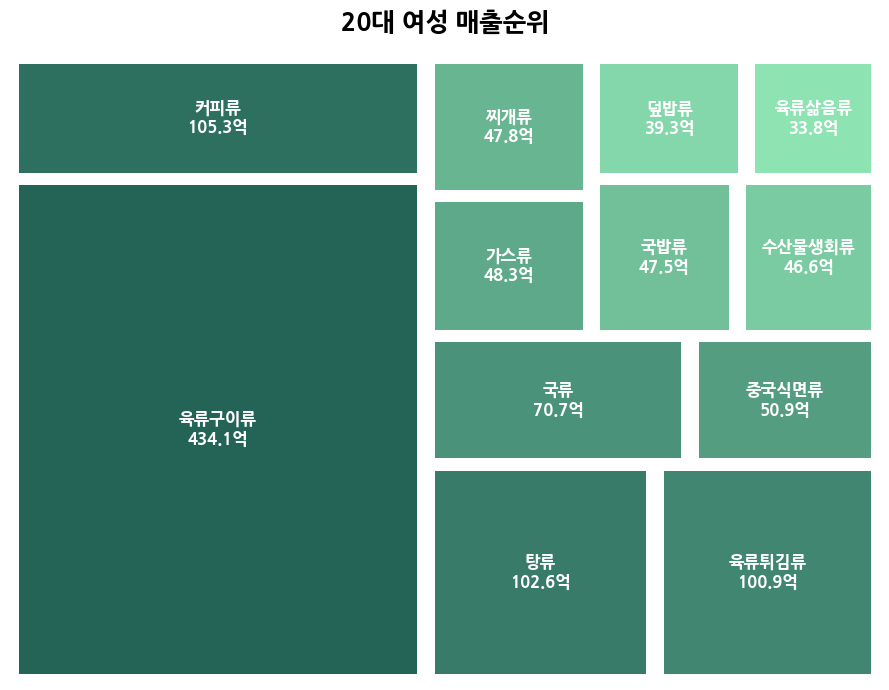

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import numpy as np
import matplotlib.colors as mcolors
import squarify

detail_money_df = detail_money_df.sort_values(by='MLE_Y20_SELG_AMNT', ascending=False).head(12)

n_bars = len(detail_money_df)
base_color = '#0B5345'  # 진한 그린
light_color = '#82E0AA'  # 밝은 그린
cmap = mcolors.LinearSegmentedColormap.from_list('stock_green', [base_color, light_color], N=n_bars)
colors = [mcolors.rgb2hex(cmap(i)) for i in range(n_bars)]

# 그래프 스타일 설정
plt.figure(figsize=(9, 7))
plt.rcParams['font.family'] = 'NanumGothic'  
# 트리맵에 필요한 데이터 준비
sizes = detail_money_df['MLE_Y20_SELG_AMNT']
labels = detail_money_df['MENU_MDCL_NM']  

# 가장 큰 값 단위 설정
max_value = detail_money_df['MLE_Y20_SELG_AMNT'].max()
if max_value >= 1e11:
    unit = '조'
    divisor = 1e11
elif max_value >= 1e8:
    unit = '억'
    divisor = 1e8
elif max_value >= 1e6:
    unit = '백만'
    divisor = 1e6
else:
    unit = ''
    divisor = 1

# 트리맵 레이블 생성 (더 명확한 폰트 크기와 색상)
formatted_labels = [f"{label}\n{value/divisor:.1f}{unit}" for label, value in zip(labels, sizes)]

# 트리맵 그리기
ax = squarify.plot(sizes=sizes, 
                   label=formatted_labels, 
                   color=colors, 
                   alpha=0.9,
                   pad=True,
                   text_kwargs={'fontsize':12, 'color':'white', 'fontweight':'bold'})

# 축 제거
plt.axis('off')

# 배경색 설정 (약간 더 밝은 회색)
ax.set_facecolor('#f8f8f8')

plt.title("20대 여성 매출순위", fontsize=18, pad=20, fontweight='bold')
plt.tight_layout()
plt.show()

------------------------------------

In [173]:
import pandas as pd

food_money_df = pd.read_csv("/home/mac/project_ws/eda-repo-5/data/여성매출관련_데이터/전국성연령대식품소비성향데이터.csv", encoding='euc-kr')
food_money_df

,BASE_YM,MDCL_TOID_CODE,MDCL_TOID_NM,MENU_LGLS_CODE,MENU_LGLS_NM,MENU_MDCL_CODE,MENU_MDCL_NM,MLE_Y20_BELO_SELG_AMNT,MLE_Y20_SELG_AMNT,MLE_Y30_SELG_AMNT,...,MLE_Y30_USE_NCAS,MLE_Y40_USE_NCAS,MLE_Y50_USE_NCAS,MLE_Y60_ANM_USE_NCAS,WO_Y20_BELO_USE_NCAS,WO_Y20_USE_NCAS,WO_Y30_USE_NCAS,WO_Y40_USE_NCAS,WO_Y50_USE_NCAS,WO_Y60_ANM_USE_NCAS
0,202312,Q10,일식/수산물,L,전/부침류,L02,야채전/부침류,NaN,2108200.0,7997500.0,...,510.0,727.0,1334.0,977.0,NaN,271.0,372.0,522.0,1131.0,706.0
1,202406,Q06,분식,Y,추가/사리,Y01,추가/사리,236800.0,4242300.0,9578872.0,...,4607.0,6846.0,6808.0,3950.0,130.0,2464.0,3945.0,6030.0,4621.0,2028.0
2,202311,Q01,간이주점,A,밥류,A09,볶음밥류,20000.0,9131906.0,7755900.0,...,1304.0,1206.0,950.0,296.0,18.0,983.0,552.0,477.0,329.0,118.0
3,202307,Q10,일식/수산물,D,국/탕/찌개/전골류,D07,찌개류,36000.0,3793800.0,14598757.0,...,1796.0,3691.0,6496.0,5615.0,NaN,226.0,839.0,1717.0,2891.0,2521.0
4,202310,Q08,유흥주점,D,국/탕/찌개/전골류,D02,나베류,NaN,427700.0,257000.0,...,10.0,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27300,202311,Q12,중식,S,떡류,S02,호떡류,NaN,NaN,NaN,...,NaN,10.0,12.0,34.0,NaN,NaN,NaN,18.0,26.0,NaN
27301,202310,Q03,닭/오리요리,T,빵/과자류,T28,크로와상류,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN
27302,202403,Q12,중식,O,장/장아찌류,O01,수산물장류,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27303,202310,Q12,중식,T,빵/과자류,T01,(잉글리쉬)머핀류,NaN,NaN,68000.0,...,4.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN


------------------------------------

In [4]:
import pandas as pd

seoul_food_df = pd.read_csv("/home/mac/project_ws/eda-repo-5/data/여성매출관련_데이터/서울상권성연령대외식매출.csv", encoding='euc-kr')
seoul_food_df

,BASE_YM,CTNP_NM,SGGU_NM,TRDAR_NM,MLE_Y20_BELO_SELG_AMNT,MLE_Y20_SELG_AMNT,MLE_Y30_SELG_AMNT,MLE_Y40_SELG_AMNT,MLE_Y50_SELG_AMNT,MLE_Y60_ANM_SELG_AMNT,WO_Y20_BELO_SELG_AMNT,WO_Y20_SELG_AMNT,WO_Y30_SELG_AMNT,WO_Y40_SELG_AMNT,WO_Y50_SELG_AMNT,WO_Y60_ANM_SELG_AMNT
0,202309,서울특별시,강남구,역삼역_4,54,438301799,1577369705,2341702035,1529320219,392712346,60,190112570,657678979,795821125,406645649,146895291
1,202312,서울특별시,강남구,선릉역_2,215699,358447909,1725581209,2532182407,1705684151,761564843,253310,166853070,724713054,849561584,582778955,294403941
2,202309,서울특별시,종로구,경복궁역_2,469543,143975680,564355848,524159757,638755057,447019893,401645,152691033,487849041,450942995,442304296,311698863
3,202404,서울특별시,종로구,종로3가역_1,137070,270270019,1281992686,1352237168,1153618854,1025604880,230457,124442765,563053360,494458921,423884323,366236325
4,202311,서울특별시,종로구,종로3가역_1,292495,353636760,1392807350,1498512788,1138894501,1006084493,188689,158058341,575996270,561747475,428794730,368794854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,202307,서울특별시,서초구,서래마을,381740,95014451,492532599,927598074,930098811,483530807,313320,58381483,298651594,560326920,532502218,272586437
3044,202307,서울특별시,성북구,안암역,1301556,277280999,377932618,296407308,415905876,170892369,1371584,225295272,302872605,241491209,295709527,120531744
3045,202405,서울특별시,중구,시청역_1,820562,270194415,1502534897,2366289324,2015504631,467630855,815982,155493291,765156714,1080614748,861000966,233938291
3046,202312,서울특별시,중구,시청역_1,690843,337090792,1464497650,2557695704,2070430600,379539537,515420,172409664,661423697,1016001310,795802082,176985671


In [5]:
seoul_food_df =seoul_food_df[["SGGU_NM", "TRDAR_NM", "WO_Y20_SELG_AMNT"]]

In [6]:
seoul_food_df['TRDAR_NM'] = seoul_food_df['TRDAR_NM'].str.replace(r'_\d+', '', regex=True)


/tmp/ipykernel_6075/1937156640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_food_df['TRDAR_NM'] = seoul_food_df['TRDAR_NM'].str.replace(r'_\d+', '', regex=True)


In [7]:
seoul_food_df = seoul_food_df.groupby("TRDAR_NM", as_index=False).agg({
    'SGGU_NM': lambda x: x.mode()[0],  # 가장 많이 등장하는 값
    'WO_Y20_SELG_AMNT': 'sum',  # 숫자 컬럼은 합산
})

In [8]:

seoul_food_df

,TRDAR_NM,SGGU_NM,WO_Y20_SELG_AMNT
0,가락시장,송파구,105985073
1,가락시장역,송파구,954078347
2,가리봉시장(구로디지털오거리),구로구,150274236
3,가산디지털단지역,금천구,9879837318
4,강남구청역,강남구,4202338790
...,...,...,...
151,한양시장,성동구,6940013280
152,한티역,강남구,1342449884
153,혜화역 대학로,종로구,15612775564
154,홍대입구역,마포구,8289860221


In [26]:
subway_df = seoul_food_df[seoul_food_df['TRDAR_NM'].str.endswith('역')]
del subway_df['SGGU_NM']

In [27]:
subway_df = subway_df.sort_values(by="WO_Y20_SELG_AMNT", ascending=False)
subway_df

,TRDAR_NM,WO_Y20_SELG_AMNT
5,강남역,40052372893
9,건대입구역,26100114151
95,신촌역,19738875339
87,신림역,17474478139
70,서울대입구역,15860073863
...,...,...
72,서초역,218920568
33,대치역,207809961
73,석촌역,181510330
131,종각역,137816626


In [11]:

gu_food_df = seoul_food_df.groupby('SGGU_NM').sum()
del gu_food_df['TRDAR_NM']
gu_food_df


,WO_Y20_SELG_AMNT
SGGU_NM,
강남구,129602454394
강동구,16627252215
강북구,13917744464
강서구,4712013978
관악구,47307593079
광진구,38866510769
구로구,6728135050
금천구,14533967797
노원구,14025927725


In [29]:
subway_avg = subway_df['WO_Y20_SELG_AMNT'].mean()
print(subway_avg)

4659499573.489362


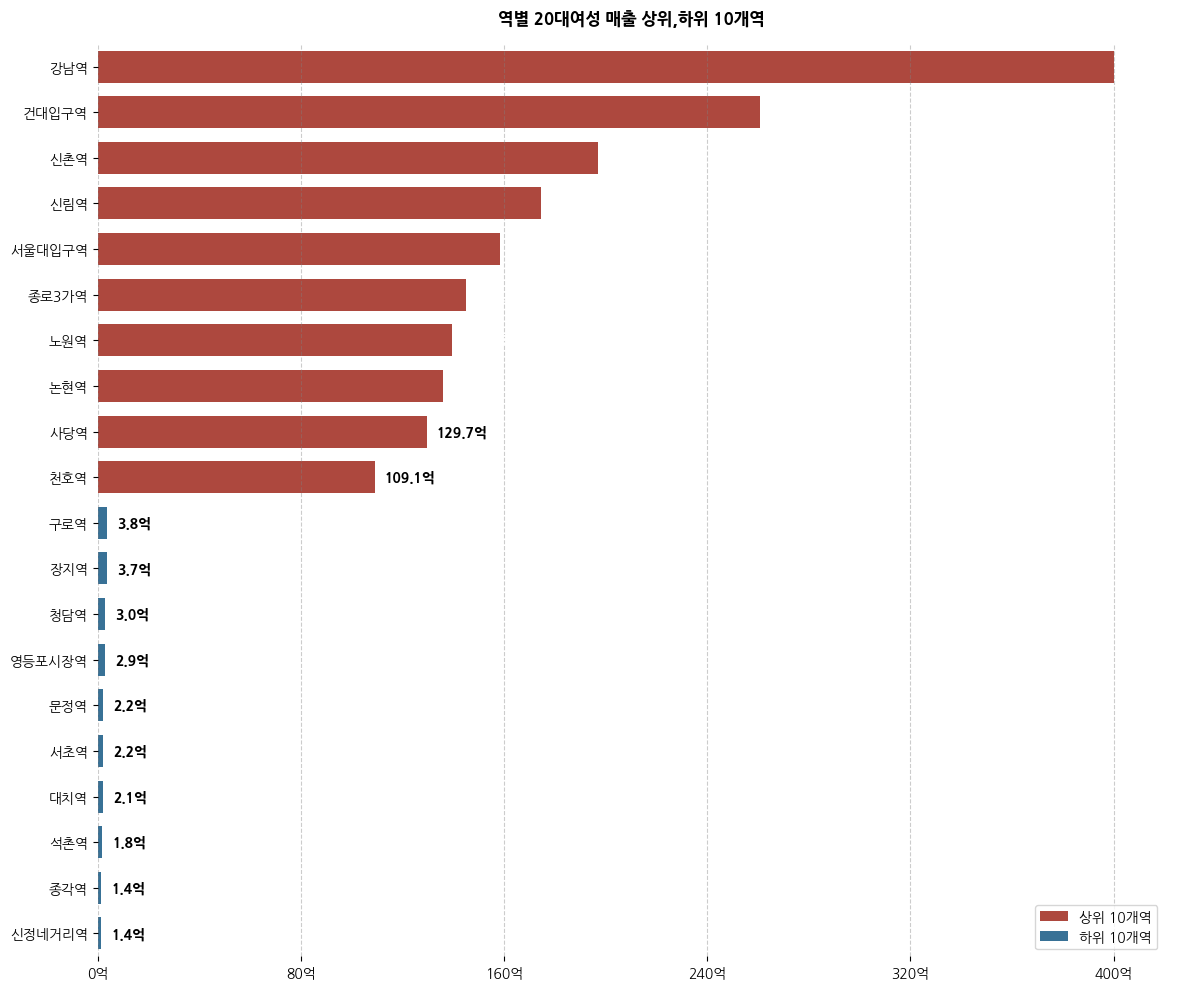

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import numpy as np

# 전체 데이터를 매출액 기준으로 정렬
sorted_subway_df = subway_df.sort_values(by='WO_Y20_SELG_AMNT', ascending=False)

# 상위 10개와 하위 10개 선택
top10 = sorted_subway_df.head(10)
bottom10 = sorted_subway_df.tail(10)

# 두 데이터프레임 합치기
combined_df = pd.concat([top10, bottom10])

# 타입 컬럼 추가 (상위 또는 하위 구분)
combined_df['타입'] = ['상위 10개역' if i < 10 else '하위 10개역' for i in range(20)]

# 가장 큰 값 단위 설정 (억, 천, 만 중 선택)
max_value = combined_df['WO_Y20_SELG_AMNT'].max()
if max_value >= 1e8:
    unit = '억'
    divisor = 1e8
elif max_value >= 1e7:
    unit = '천만'
    divisor = 1e7
elif max_value >= 1e4:
    unit = '만'
    divisor = 1e4
else:
    unit = ''
    divisor = 1

# 값 변환
combined_df['WO_Y20_SELG_AMNT'] = combined_df['WO_Y20_SELG_AMNT'] / divisor

# 색상 설정 (비즈니스 친화적 색상)
colors = {
    '상위 10개역': '#C0392B',  # 진한 비즈니스 레드
    '하위 10개역': '#2874A6'   # 진한 비즈니스 블루
}
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import numpy as np
import matplotlib.patches as patches

# 기존 데이터 사용 (subway_df)
subway_df = subway_df.sort_values(by='WO_Y20_SELG_AMNT', ascending=False).head(20)

# 평균 계산
average_sales = subway_df['WO_Y20_SELG_AMNT'].mean()

# 가장 큰 값 단위 설정 (억, 천, 만 중 선택)
max_value = subway_df['WO_Y20_SELG_AMNT'].max()
if max_value >= 1e8:
    unit = '억'
    divisor = 1e8
elif max_value >= 1e7:
    unit = '천만'
    divisor = 1e7
elif max_value >= 1e4:
    unit = '만'
    divisor = 1e4
else:
    unit = ''
    divisor = 1

# 평균값도 단위 변환
average_sales_converted = average_sales / divisor

# 평균 이상인 역만 필터링
above_average_df = subway_df[subway_df['WO_Y20_SELG_AMNT'] > average_sales].sort_values(by='WO_Y20_SELG_AMNT', ascending=False)

# 그림 생성
fig = plt.figure(figsize=(15, 8), facecolor='white')
grid = plt.GridSpec(1, 2, width_ratios=[1, 1.2])

# 왼쪽: 원형 차트
ax1 = plt.subplot(grid[0])

# 동심원 그리기
circle_colors = ['#FEE5E5', '#FCC5C5', '#FA9E9E', '#F57676', '#C0392B']
circle_sizes = [3.2, 2.8, 2.4, 2.0, 1.6]

for size, color in zip(circle_sizes, circle_colors):
    circle = plt.Circle((0.5, 0.5), size/10, color=color, alpha=0.9)
    ax1.add_patch(circle)

# 가운데 텍스트 추가
ax1.text(0.5, 0.58, "지하철역", color='white', fontsize=14, fontweight='bold', 
         horizontalalignment='center', verticalalignment='center')
ax1.text(0.5, 0.5, "평균 매출액", color='white', fontsize=14, fontweight='bold', 
         horizontalalignment='center', verticalalignment='center')
ax1.text(0.5, 0.4, f"{average_sales_converted:.2f}{unit}", color='white', fontsize=16, fontweight='bold', 
         horizontalalignment='center', verticalalignment='center')

# 축 제거 및 설정
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')

# 오른쪽: 막대 그래프
ax2 = plt.subplot(grid[1])

# 수평 막대 그래프 그리기
bars = ax2.barh(above_average_df['TRDAR_NM'], above_average_df['WO_Y20_SELG_AMNT'], color='#C0392B', height=0.6)

# 평균선 추가
ax2.axvline(x=average_sales_converted, color='#C0392B', linestyle='--', alpha=0.8)
ax2.text(average_sales_converted + 2, 0.5, '평균', color='#C0392B', fontsize=10)

# 막대 끝에 값 표시
for i, v in enumerate(above_average_df['WO_Y20_SELG_AMNT']):
    ax2.text(v + max_value*0.01/divisor, i, f'{v:.1f}{unit}', va='center')

# "총 N개 역" 텍스트 박스 추가
props = dict(boxstyle='round', facecolor='#C0392B', alpha=0.9)
# 위치는 데이터에 따라 조정 필요
midpoint = len(above_average_df) // 2
ax2.text(max_value*0.75/divisor, midpoint, f'총 {len(above_average_df)}개 역', 
         fontsize=12, color='white', fontweight='bold', bbox=props, ha='center')

# 축 설정
ax2.set_title("평균 이상 매출 지하철역", fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel("20대 여성 매출액", fontsize=12)
ax2.set_xlim(0, max_value/divisor)
ax2.grid(axis='x', linestyle='--', alpha=0.3)

# 축 테두리 제거
for spine in ax2.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig('subway_sales_chart.png', dpi=300, bbox_inches='tight')
plt.show()
width=0.7

# X축 범위 설정 및 라벨 조정
xticks = np.linspace(0, max_value / divisor, num=6)
xtick_labels = [f"{int(tick)}{unit}" for tick in xticks]
plt.xticks(xticks, xtick_labels)

# 그리드 추가
plt.grid(axis='x', linestyle="--", alpha=0.4, color='gray')

# 범례 위치 조정
plt.legend(title="", loc='lower right')

# 차트에 값 추가
for i, v in enumerate(combined_df['WO_Y20_SELG_AMNT']):
    color = 'white' if v > max_value / divisor / 3 else 'black'
    plt.text(v + max_value / divisor * 0.01, i, f"{v:.1f}{unit}", 
             color=color, va='center', fontweight='bold')

# 테두리 제거
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xlabel("")
plt.ylabel("")
plt.title("역별 20대여성 매출 상위,하위 10개역", fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

In [30]:
subway_avg = int(subway_avg)

In [31]:
subway_avg 


4659499573

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import numpy as np
import matplotlib.patches as patches

# 기존 데이터 사용 (subway_df)
subway_df = subway_df.sort_values(by='WO_Y20_SELG_AMNT', ascending=False).head(20)

# 평균 계산
average_sales = subway_df['WO_Y20_SELG_AMNT'].mean()

# 가장 큰 값 단위 설정 (억, 천, 만 중 선택)
max_value = subway_df['WO_Y20_SELG_AMNT'].max()
if max_value >= 1e8:
    unit = '억'
    divisor = 1e8
elif max_value >= 1e7:
    unit = '천만'
    divisor = 1e7
elif max_value >= 1e4:
    unit = '만'
    divisor = 1e4
else:
    unit = ''
    divisor = 1

# 값 변환
subway_df['WO_Y20_SELG_AMNT_CONVERTED'] = subway_df['WO_Y20_SELG_AMNT'] / divisor
average_sales_converted = average_sales / divisor

# 평균 이상인 역만 필터링
above_average_df = subway_df[subway_df['WO_Y20_SELG_AMNT'] > subway_avg ].sort_values(by='WO_Y20_SELG_AMNT', ascending=False)
above_average_df['WO_Y20_SELG_AMNT_CONVERTED'] = above_average_df['WO_Y20_SELG_AMNT'] 

# 그림 생성
fig = plt.figure(figsize=(15, 8), facecolor='white')
grid = plt.GridSpec(1, 2, width_ratios=[1, 1.2])

# 왼쪽: 원형 차트
ax1 = plt.subplot(grid[0])

# 동심원 그리기 - 크기 조정 수정
circle_colors = [ '#FCC5C5', '#FA9E9E', '#F57676', '#C0392B']
circle_sizes = [0.32, 0.28, 0.24, 0.20]  # 크기 값을 직접 작은 값으로 설정

for size, color in zip(circle_sizes, circle_colors):
    circle = plt.Circle((0.5, 0.5), size, color=color, alpha=0.9)
    ax1.add_patch(circle)

# 가운데 텍스트 추가
ax1.text(0.5, 0.58, "역별 20대 여성", color='white', fontsize=14, fontweight='bold', 
         horizontalalignment='center', verticalalignment='center')
ax1.text(0.5, 0.5, "평균 매출액", color='white', fontsize=14, fontweight='bold', 
         horizontalalignment='center', verticalalignment='center')
ax1.text(0.5, 0.4, "46억 5천만원", color='white', fontsize=16, fontweight='bold', 
         horizontalalignment='center', verticalalignment='center')

# 축 제거 및 설정
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')

# 오른쪽: 막대 그래프
ax2 = plt.subplot(grid[1])

# 수평 막대 그래프 그리기
bars = ax2.barh(above_average_df['TRDAR_NM'], above_average_df['WO_Y20_SELG_AMNT_CONVERTED'], color='#C0392B', height=0.4)

# 막대 끝에 값 표시
for i, v in enumerate(above_average_df['WO_Y20_SELG_AMNT_CONVERTED']):
    ax2.text(v + max_value*0.01/divisor, i, f'{v:.1f}{unit}', va='center')

# "총 N개 역" 텍스트 박스 추가
props = dict(boxstyle='round', facecolor='#C0392B', alpha=0.)
# 위치는 데이터에 따라 조정 필요
midpoint = len(above_average_df)
ax2.text(max_value*0.5/divisor, midpoint, f'총 {len(above_average_df)}개 역', 
         fontsize=12, color='white', fontweight='bold', bbox=props, ha='center')

# 축 설정
ax2.set_title("평균 이상 매출 지하철역", fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel("20대 여성 매출액", fontsize=12)
ax2.set_xlim(0, max_value*1.1/divisor)  # 여백 추가
ax2.grid(axis='x', linestyle='--', alpha=0.3)

# 축 테두리 제거
for spine in ax2.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

/tmp/ipykernel_6075/4139042276.py:92: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. matplotlib.backends._backend_agg.RendererAgg(width: int, height: int, dpi: float)

Invoked with: 52404208092, 716, 100.0

<Figure size 1500x800 with 2 Axes>